In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prepare as prep

import functions as f

import warnings
warnings.filterwarnings('ignore')

from scipy import stats

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('wine_df.csv')
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'sulphates'], inplace=True)
df.rename(columns={'fixed acidity':'fixed','volatile acidity':'volatile','citric acid':'citric',
           'residual sugar':'sugar','free sulfur dioxide':'fso2','total sulfur dioxide':'tso2'}, inplace=True)

In [3]:
col_list = df.select_dtypes(include=['float64','int64']).columns[:-1]

In [4]:
df, var_fences = prep.remove_outliers(df)

quality column ignored
type column ignored


In [5]:
df.head()

,fixed,volatile,citric,sugar,chlorides,fso2,tso2,density,pH,alcohol,quality,type
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,9.9,6,white
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,10.1,6,white


In [6]:
df = df[(df['quality']!=3) & (df['quality']!=9)]

In [7]:
baseline = (df['quality']==6).mean()

In [8]:
df = pd.get_dummies(df, columns=['type'])

In [9]:
X_train, y_train, X_val, y_val, X_test, y_test = prep.x_y_split(df, 'quality')

In [10]:
X_train.head()

,fixed,volatile,citric,sugar,chlorides,fso2,tso2,density,pH,alcohol,type_red,type_white
3498,6.4,0.30,0.36,2.00,0.052,18.0,141.0,0.99273,3.38,10.5,0,1
2089,7.9,0.17,0.32,1.60,0.053,47.0,150.0,0.99480,3.29,9.6,0,1
4934,7.8,0.60,0.14,2.40,0.086,3.0,15.0,0.99750,3.42,10.8,1,0
446,5.8,0.28,0.27,2.60,0.054,30.0,156.0,0.99140,3.53,12.4,0,1
3392,6.7,0.38,0.26,9.55,0.036,35.0,91.0,0.99190,2.98,12.4,0,1


In [11]:
X = [X_train, X_val, X_test]

In [12]:
X = f.cluster_so2(X)

In [13]:
X = f.cluster_acids(X)

In [14]:
X = f.cluster_visc(X)

In [15]:
X[0]

,fixed,volatile,citric,sugar,chlorides,fso2,tso2,density,pH,alcohol,...,so2,centroid_fso2,centroid_tso2,acids,centroid_fixed,centroid_volatile,centroid_citric,visc,centroid_density,centroid_alcohol
3498,6.4,0.30,0.36,2.00,0.052,18.0,141.0,0.99273,3.38,10.5,...,0,30.057734,120.983115,2,6.064677,0.282930,0.296129,4,0.994751,10.162013
2089,7.9,0.17,0.32,1.60,0.053,47.0,150.0,0.99480,3.29,9.6,...,0,30.057734,120.983115,2,6.064677,0.282930,0.296129,4,0.994751,10.162013
4934,7.8,0.60,0.14,2.40,0.086,3.0,15.0,0.99750,3.42,10.8,...,0,30.057734,120.983115,2,6.064677,0.282930,0.296129,4,0.994751,10.162013
446,5.8,0.28,0.27,2.60,0.054,30.0,156.0,0.99140,3.53,12.4,...,0,30.057734,120.983115,2,6.064677,0.282930,0.296129,4,0.994751,10.162013
3392,6.7,0.38,0.26,9.55,0.036,35.0,91.0,0.99190,2.98,12.4,...,0,30.057734,120.983115,2,6.064677,0.282930,0.296129,4,0.994751,10.162013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055,7.1,0.43,0.42,5.50,0.071,28.0,128.0,0.99730,3.42,10.5,...,2,48.490486,199.017970,0,7.037187,0.292225,0.317263,3,0.991709,11.904283
545,6.4,0.16,0.22,1.40,0.040,41.0,149.0,0.99330,3.49,10.0,...,2,48.490486,199.017970,0,7.037187,0.292225,0.317263,3,0.991709,11.904283
3501,6.7,0.24,0.36,8.40,0.042,42.0,123.0,0.99473,3.34,10.9,...,2,48.490486,199.017970,0,7.037187,0.292225,0.317263,3,0.991709,11.904283
4263,7.0,0.55,0.05,8.00,0.036,19.0,164.0,0.99269,3.26,12.2,...,2,48.490486,199.017970,0,7.037187,0.292225,0.317263,3,0.991709,11.904283


In [16]:
X[0].drop(columns=['centroid_fso2', 'centroid_tso2','centroid_fixed',
                   'centroid_volatile','centroid_citric','centroid_density','centroid_alcohol'], inplace=True)

In [17]:
X[1].drop(columns=['centroid_fso2', 'centroid_tso2','centroid_fixed',
                   'centroid_volatile','centroid_citric','centroid_density','centroid_alcohol'], inplace=True)

In [18]:
X[2].drop(columns=['centroid_fso2', 'centroid_tso2','centroid_fixed',
                   'centroid_volatile','centroid_citric','centroid_density','centroid_alcohol'], inplace=True)

In [19]:
X[0]

,fixed,volatile,citric,sugar,chlorides,fso2,tso2,density,pH,alcohol,type_red,type_white,so2,acids,visc
3498,6.4,0.30,0.36,2.00,0.052,18.0,141.0,0.99273,3.38,10.5,0,1,0,2,4
2089,7.9,0.17,0.32,1.60,0.053,47.0,150.0,0.99480,3.29,9.6,0,1,0,2,4
4934,7.8,0.60,0.14,2.40,0.086,3.0,15.0,0.99750,3.42,10.8,1,0,0,2,4
446,5.8,0.28,0.27,2.60,0.054,30.0,156.0,0.99140,3.53,12.4,0,1,0,2,4
3392,6.7,0.38,0.26,9.55,0.036,35.0,91.0,0.99190,2.98,12.4,0,1,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055,7.1,0.43,0.42,5.50,0.071,28.0,128.0,0.99730,3.42,10.5,1,0,2,0,3
545,6.4,0.16,0.22,1.40,0.040,41.0,149.0,0.99330,3.49,10.0,0,1,2,0,3
3501,6.7,0.24,0.36,8.40,0.042,42.0,123.0,0.99473,3.34,10.9,0,1,2,0,3
4263,7.0,0.55,0.05,8.00,0.036,19.0,164.0,0.99269,3.26,12.2,0,1,2,0,3


In [20]:
X_train, X_val, X_test = X[0], X[1], X[2]

In [21]:
X_train = pd.get_dummies(X_train, columns=['so2', 'acids','visc'])

In [22]:
X_val = pd.get_dummies(X_val, columns=['so2', 'acids','visc'])

In [23]:
X_test = pd.get_dummies(X_test, columns=['so2', 'acids','visc'])

In [24]:

tree_train = []
tree_val = []
depth = []
for i in range(2, 21):
    train_tree = DecisionTreeClassifier(max_depth=i, random_state=42)
    train_tree = train_tree.fit(X_train, y_train)
    
    tree_train.append(train_tree.score(X_train, y_train))
    tree_val.append(train_tree.score(X_val, y_val))
    depth.append(i)

In [25]:
scores = pd.DataFrame({'score':tree_train,
                       'type':'train',
                       'depth':depth})

In [26]:
val_scores = pd.DataFrame({'score':tree_val,
                           'type':'val',
                           'depth':depth})

In [27]:
scores = scores.append(val_scores)

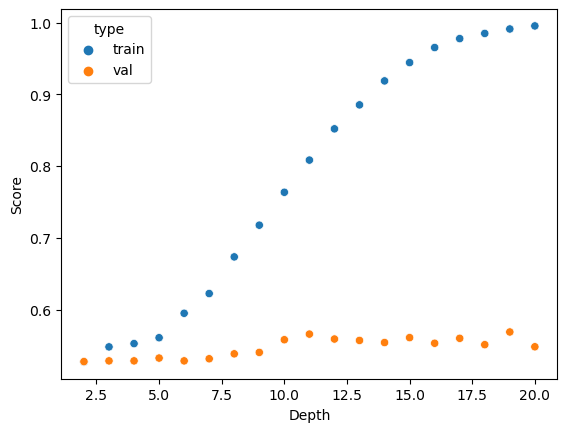

In [28]:
sns.scatterplot(x='depth', y='score', data=scores, hue='type')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.show()

In [31]:
    rfc_train = []
    rfc_val = []
    depth = []
    for i in range(2, 21):
        rf = RandomForestClassifier(bootstrap=True, 
                                    class_weight=None, 
                                    criterion='gini',
                                    min_samples_leaf=3,
                                    n_estimators=100,
                                    max_depth=i, 
                                    random_state=42)

        rf.fit(X_train, y_train)

        rfc_train.append(rf.score(X_train, y_train))
        rfc_val.append(rf.score(X_val, y_val))
        depth.append(i)

# RFC function

In [148]:
def random_for_class(X_train, y_train):
    '''
    '''
    rfc_train = []
    rfc_val = []
    depth = []
    for i in range(2, 21):
        rf = RandomForestClassifier(bootstrap=True, 
                                    class_weight=None, 
                                    criterion='gini',
                                    min_samples_leaf=3,
                                    n_estimators=100,
                                    max_depth=i, 
                                    random_state=42)

        rf.fit(X_train, y_train)

        rfc_train.append(rf.score(X_train, y_train))
        rfc_val.append(rf.score(X_val, y_val))
        depth.append(i)
    # Creating the rfc_dataframe
    rfc_scores = pd.DataFrame({'score':rfc_train,
                           'type':'train',
                           'depth':depth})

    val_rfc_scores = pd.DataFrame({'score':rfc_val,
                                   'type':'val',
                                   'depth':depth})

    rfc_scores = rfc_scores.append(val_rfc_scores)
    rfc_scores = pd.DataFrame({'score':rfc_train,
                           'type':'train',
                           'depth':depth})

    val_rfc_scores = pd.DataFrame({'score':rfc_val,
                                   'type':'val',
                                   'depth':depth})

    rfc_scores = rfc_scores.append(val_rfc_scores)

    train_acc=rfc_scores.loc[rfc_scores['type'] == 'train']
    val_acc=rfc_scores.loc[rfc_scores['type'] == 'val']

    train_depth=rfc_scores.loc[rfc_scores['type']== 'train']['depth']
    val_depth=rfc_scores.loc[rfc_scores['type']== 'val']['depth']

    rfc_score_df= pd.DataFrame(
        {'train_score': train_acc.score,
        'val_score': val_acc.score,
         'train_depth': train_depth,
         'val_depth' : val_depth
        })

    f, ax = plt.subplots(1, 1)


    plt.title("Random Forest Classifier Accuracy and Depth Chart")


    sns.pointplot(data =rfc_score_df, x='train_depth', y='train_score', label='Train',color='seagreen')
    sns.pointplot(data =rfc_score_df, x='val_depth', y='val_score', label='Val', color="royalblue")
    plt.ylabel('score')
    plt.xlabel('depth')
    ax.legend()
    plt.show()


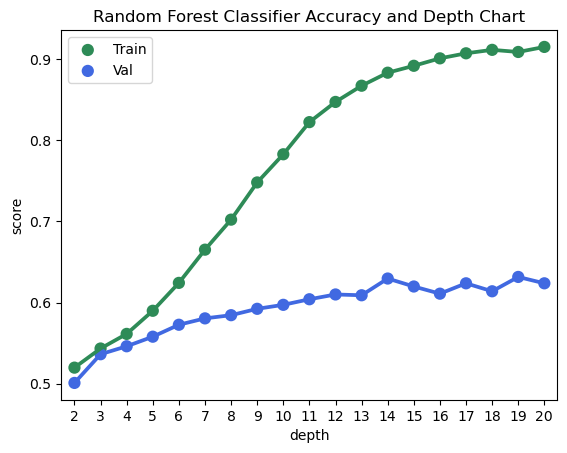

In [149]:
random_for_class(X_train, y_train)

In [160]:
rfc_train = []
rfc_val = []
depth = []
for i in range(2, 21):
    rf = RandomForestClassifier(bootstrap=True, 
                                    class_weight=None, 
                                    criterion='gini',
                                    min_samples_leaf=3,
                                    n_estimators=100,
                                    max_depth=i, 
                                    random_state=42)

    rf.fit(X_train, y_train)

    rfc_train.append(rf.score(X_train, y_train))
    rfc_val.append(rf.score(X_val, y_val))
    depth.append(i)
    rfc_scores = rfc_scores.append(val_rfc_scores)

In [161]:
rfc_scores

,score,type,depth
0,0.519817,train,2
1,0.543400,train,3
2,0.561415,train,4
3,0.589912,train,5
4,0.624304,train,6
...,...,...,...
14,0.611002,val,16
15,0.623772,val,17
16,0.613949,val,18
17,0.631631,val,19


In [155]:
rfc_scores

,score,type,depth
0,0.519817,train,2
1,0.543400,train,3
2,0.561415,train,4
3,0.589912,train,5
4,0.624304,train,6
5,0.665247,train,7
6,0.702260,train,8
7,0.748117,train,9
8,0.782837,train,10
9,0.822470,train,11


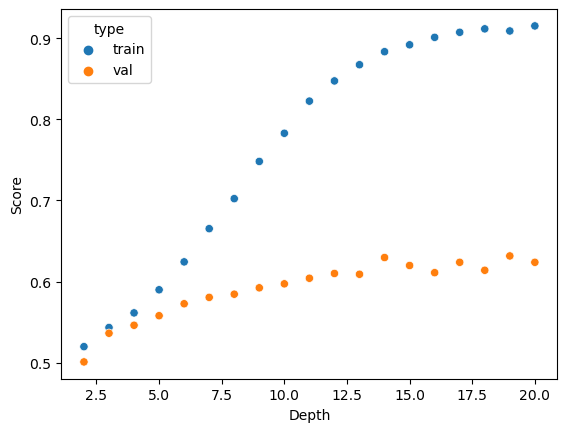

In [60]:
sns.scatterplot(x='depth', y='score', data=rfc_scores, hue='type')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.show()

In [245]:
def log_reg_class(X_train, y_train, X_val, y_val):
    
    logit = LogisticRegression(C=1, random_state=42, solver='lbfgs')
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_train)
    lbfgs_train =logit.score(X_train, y_train)
    lbfgs_val= logit.score(X_val, y_val)


    logit = LogisticRegression(C=1, random_state=42, solver='newton-cg')
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_train)
    newcg_train =logit.score(X_train, y_train)
    newcg_val= logit.score(X_val, y_val)


    logit = LogisticRegression(C=2, random_state=42, solver='liblinear')
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_train)
    libl_train= logit.score(X_train, y_train)
    libl_val= logit.score(X_val, y_val)
    libl_val= logit.score(X_val, y_val)


    logit = LogisticRegression(C=1, random_state=42, solver='sag')
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_train)
    sag_train = logit.score(X_train, y_train)
    sag_val = logit.score(X_val, y_val)


    logit = LogisticRegression(C=1, random_state=42, solver='saga')
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_train)
    saga_train = logit.score(X_train, y_train)
    saga_val = logit.score(X_val, y_val)

    
    acc_df= pd.DataFrame(
        {'model': ['lbfgs', 
                   'newton-cg', 
                   'liblinear', 
                   'sag', 'saga'], 
         'train': [lbfgs_train,
                   newcg_train,
                   libl_train,
                   sag_train,
                  saga_train],
        'val': [lbfgs_val,
              newcg_val,
               libl_val,
                sag_val,
                saga_val
              ]})
    
    f, ax = plt.subplots(1, 1) 
    plt.title("Accuracy for each Logistic Regression Model")
    sns.pointplot(data= acc_df, x='model', y='train', label='Train', color='royalblue')
    sns.pointplot(data= acc_df, x='model', y='val', label='Val', color='seagreen')
    plt.xlabel("Model")
    plt.ylabel("Score")
    ax.legend()
    plt.show()
    
    print('lbfgs')
    print(f'Train: {lbfgs_train}')
    print(f'Val: {lbfgs_val}')
    
    print('newton-cg')
    print(f'Train: {newcg_train}')
    print(f'Val: {newcg_val}')
    
    print('sag')
    print(f'Train: {sag_train}')
    print(f'Val: {sag_val}')
    
    print('saga')
    print(f'Train: {saga_train}')
    print(f'Val: {saga_val}')

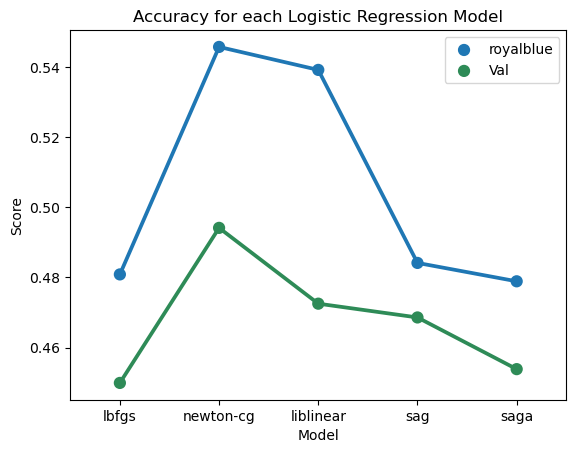

lbfgs
Train: 0.48083851948902717
Val: 0.449901768172888
newton-cg
Train: 0.5456927612184737
Val: 0.49410609037328096
sag
Train: 0.48411398624303964
Val: 0.468565815324165
saga
Train: 0.4788732394366197
Val: 0.4538310412573674


In [151]:
log_reg_class(X_train, y_train, X_val, y_val)

In [ ]:
logit = LogisticRegression(C=1, random_state=42, solver='lbfgs')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print('lbfgs')
print('Train: ', logit.score(X_train, y_train))
print('Val: ', logit.score(X_val, y_val))

In [ ]:
logit = LogisticRegression(C=1, random_state=42, solver='newton-cg')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print('newton-cg')
print('Train: ', logit.score(X_train, y_train))
print('Val: ', logit.score(X_val, y_val))

In [ ]:
logit = LogisticRegression(C=2, random_state=42, solver='liblinear')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print('liblinear')
print('Train: ', logit.score(X_train, y_train))
print('Val: ', logit.score(X_val, y_val))

In [ ]:
logit = LogisticRegression(C=1, random_state=42, solver='sag')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print('sag')
print('Train: ', logit.score(X_train, y_train))
print('Val: ', logit.score(X_val, y_val))

In [61]:
logit = LogisticRegression(C=1, random_state=42, solver='saga')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print('saga')
print('Train: ', logit.score(X_train, y_train))
print('Val: ', logit.score(X_val, y_val))

lbfgs
Train:  0.48083851948902717
Val:  0.449901768172888


In [244]:
def knn_scores(X_train, y_train, X_val, y_val):
    knn_train = []
    knn_val = []
    depth = []

    for i in range(2, 51):
        knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_train)
        y_pred_proba = knn.predict_proba(X_train)

        depth.append(i)
        
        knn_train.append(knn.score(X_train, y_train))
        knn_val.append(knn.score(X_val, y_val))

    knn_scores = pd.DataFrame({'score':knn_train,
                                   'type':'train',
                                   'depth':depth})

    val_knn_scores = pd.DataFrame({'score':knn_val,
                                       'type':'val',
                                       'depth':depth})

    knn_scores = knn_scores.append(val_knn_scores)

    acc_df= pd.DataFrame(
            {'train_depth': knn_scores.depth[0:49], 
             'val_depth' : val_knn_scores.depth[0:49],
             'train_knn_score': knn_scores.score.values[0:49],
            'val_knn_score': val_knn_scores.score.values[0:49]
                  })

    f, ax=plt.subplots(1,1)
    plt.title("KNN Scores Accuracy with Depth")
    sns.pointplot(x='train_depth', y='train_knn_score', data=acc_df, color='seagreen', label='Train')
    sns.pointplot(x='val_depth', y='val_knn_score', data=acc_df, color='royalblue', label='Val')
    plt.xlabel('Depth')
    plt.ylabel('Score')
    plt.xlim(0, 26)
    ax.legend()
    plt.show()

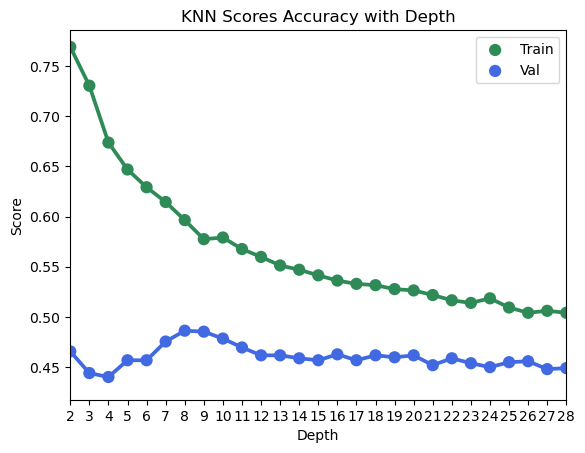

In [246]:
knn_scores(X_train, y_train, X_val, y_val)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


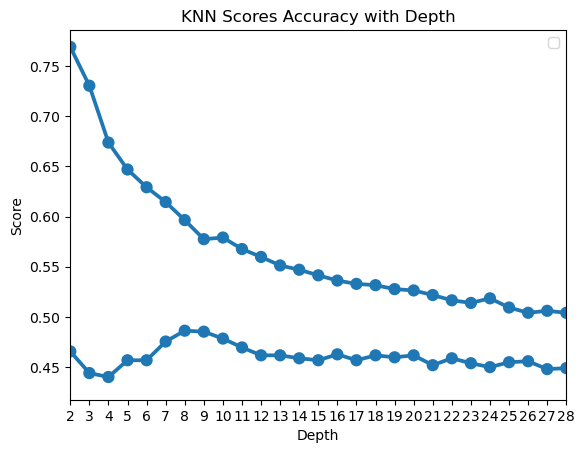

In [239]:
        val_knn_scores = pd.DataFrame({'score':knn_val,
                                       'type':'val',
                                       'depth':depth})

        knn_scores = knn_scores.append(val_knn_scores)

        acc_df= pd.DataFrame(
            {'train_depth': knn_scores.depth[0:49], 
             'val_depth' : val_knn_scores.depth[0:49],
             'train_knn_score': knn_scores.score.values[0:49],
            'val_knn_score': val_knn_scores.score.values[0:49]
                  })

        f, ax=plt.subplots(1,1)
        plt.title("KNN Scores Accuracy with Depth")
        sns.pointplot(x='train_depth', y='train_knn_score', data=acc_df)
        sns.pointplot(x='val_depth', y='val_knn_score', data=acc_df)
        plt.xlabel('Depth')
        plt.ylabel('Score')
        plt.xlim(0, 26)
        ax.legend()
        plt.show()

In [205]:
knn_train = []
knn_val = []
depth = []

for i in range(2, 51):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    y_pred_proba = knn.predict_proba(X_train)
    
    depth.append(i)
    knn_train.append(knn.score(X_train, y_train))
    knn_val.append(knn.score(X_val, y_val))

In [210]:
knn_scores = pd.DataFrame({'score':knn_train,
                           'type':'train',
                           'depth':depth})

val_knn_scores = pd.DataFrame({'score':knn_val,
                               'type':'val',
                               'depth':depth})

knn_scores = knn_scores.append(val_knn_scores)

49.0

In [231]:
acc_df= pd.DataFrame(
            {'train_depth': knn_scores.depth[0:49], 
             'val_depth' : val_knn_scores.depth[0:49],
             'train_knn_score': knn_scores.score.values[0:49],
            'val_knn_score': val_knn_scores.score.values[0:49]
                  })

In [194]:
knn_scores

,score,type,depth
0,0.769080,train,2
1,0.730429,train,3
2,0.673764,train,4
3,0.646905,train,5
4,0.629217,train,6
...,...,...,...
44,0.454813,val,46
45,0.447937,val,47
46,0.444990,val,48
47,0.434185,val,49


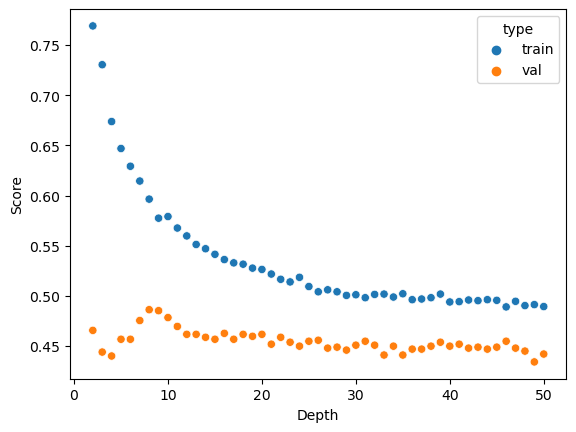

In [69]:
sns.scatterplot(x='depth', y='score', data=knn_scores, hue='type')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.show()

In [70]:
rfc_scores[rfc_scores['depth']==5]

,score,type,depth
3,0.589912,train,5
3,0.557957,val,5


In [71]:
scores[scores['depth']==5]

,score,type,depth
3,0.560760,train,5
3,0.532417,val,5


In [ ]:
def test_score(X_train, y_train, X_test, y_test):
    

In [72]:
rf = RandomForestClassifier(bootstrap=True, 
                                class_weight=None, 
                                criterion='gini',
                                min_samples_leaf=3,
                                n_estimators=100,
                                max_depth=i, 
                                random_state=42)
    
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

0.6227897838899804

In [74]:
baseline

0.45057968166633916